In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python matplotlib

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
#load movenet model
#this one: https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3

interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

In [ ]:
#open the webcame

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('MoveNet Lightning', frame)

    c = cv2.waitKey(10)
    if c == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

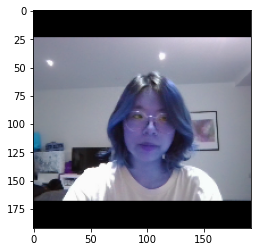

In [32]:
# show the last image before closed
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [10]:
#try some keypoints

#A float32 tensor of shape [1, 1, 17, 3].

#The first two channels of the last dimension represents the yx coordinates (normalized to image frame, i.e. range in [0.0, 1.0]) of the 17 keypoints (in the order of: [nose, left eye, right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist, right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle]).

#The third channel of the last dimension represents the prediction confidence scores of each keypoint, also in the range [0.0, 1.0].

right_eye = keypoints_with_scores[0][0][2]

In [16]:
right_eye

array([0.5357792 , 0.46248627, 0.4250128 ], dtype=float32)

In [13]:
img.shape

(480, 640, 3)

In [3]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
right_eye = keypoints_with_scores[0][0][2]
left_elbow = keypoints_with_scores[0][0][7]

In [18]:
right_eye[:2]*[480,640]

array([257.17400551, 295.99121094])

In [19]:
np.array(right_eye[:2]*[480,640]).astype(int)

array([257, 295])

In [4]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [5]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0


In [6]:
#draw Keypoints
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,50), -1) 

In [7]:
#named edges

EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [25]:
shaped[0], shaped[1]


(array([295.68720818, 337.0690155 ,   0.78505814]),
 array([268.48039627, 376.38317108,   0.51725632]))

In [8]:
#draw egdes
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))
    print (y1,x1,c1,y2,x2,c2)

(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0
(0, 0)
0.0 0.0 0.0 0.0 0.0 0.0


In [28]:
print((int(x2), int(y2)))

(232, 398)


In [9]:
#draw the line with the points

def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 5)

In [ ]:
#full movenet

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    #setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    #make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    #print(keypoints_with_scores)
    
    #rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    #press q to quit the webcame
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [10]:
from matplotlib.animation import FuncAnimation
import random
import numpy as np

In [34]:
import imageio

In [11]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [32]:
cap.release()
cv2.destroyAllWindows()

In [110]:
plt.imshow(outputs[0][0])


In [56]:
keypoints_with_scores

array([[[[0.52326715, 0.31527847, 0.60029924],
         [0.46441716, 0.37279332, 0.7988458 ],
         [0.4696363 , 0.26179528, 0.8408457 ],
         [0.5045022 , 0.44053766, 0.6636604 ],
         [0.51227105, 0.2035812 , 0.7433299 ],
         [0.7989967 , 0.577466  , 0.59142447],
         [0.7456133 , 0.04851765, 0.6441846 ],
         [0.8754318 , 0.6860815 , 0.0541622 ],
         [0.967518  , 0.00651064, 0.03699461],
         [0.8479122 , 0.8935454 , 0.07246251],
         [0.8446964 , 0.1378541 , 0.00898755],
         [0.83915174, 0.8953414 , 0.04602727],
         [0.83914536, 0.89201117, 0.04658698],
         [0.8371552 , 0.63144666, 0.01044702],
         [0.7460157 , 0.02582856, 0.04355264],
         [0.84097785, 0.90297997, 0.07429875],
         [0.8429684 , 0.8998605 , 0.06924928]]]], dtype=float32)

In [14]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

TF Version:  2.8.0
TF-Hub version:  0.12.0
Eager mode enabled:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available:  False


In [15]:
# @title Define image loading and visualization functions  { display-mode: "form" }

def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()


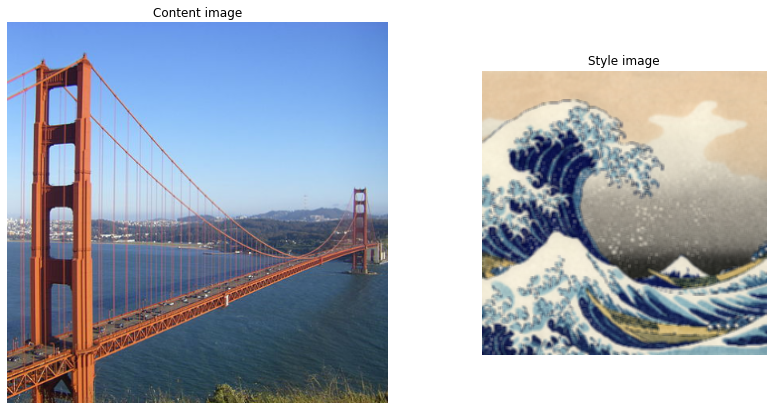

In [16]:
# @title Load example images  { display-mode: "form" }

content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg'  # @param {type:"string"}
style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg'  # @param {type:"string"}
output_image_size = 384  # @param {type:"integer"}

# The content image size can be arbitrary.
content_img_size = (output_image_size, output_image_size)
# The style prediction model was trained with image size 256 and it's the 
# recommended image size for the style image (though, other sizes work as 
# well but will lead to different results).
style_img_size = (256, 256)  # Recommended to keep it at 256.

content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

In [17]:
# Load TF-Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load('magenta_arbitrary-image-stylization-v1-256_2')

In [18]:
# Stylize content image with given style image.
# This is pretty fast within a few milliseconds on a GPU.

outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

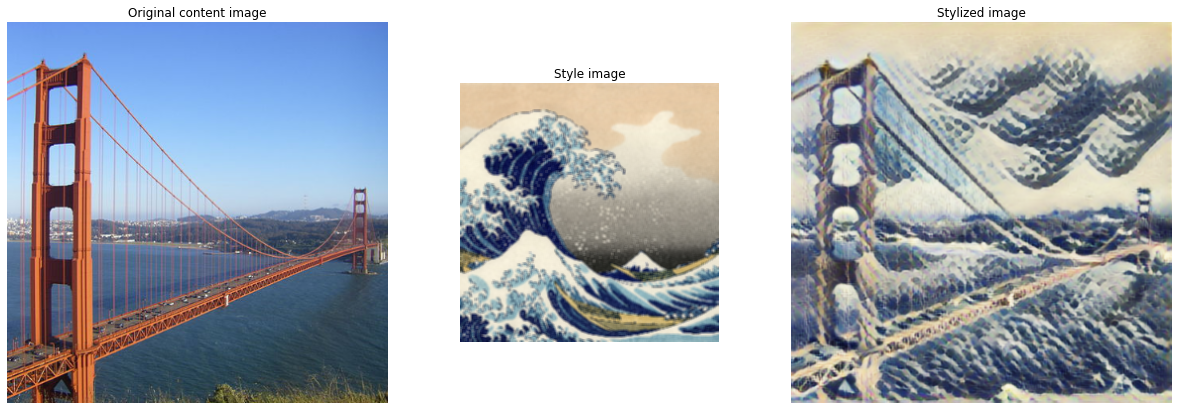

In [19]:
# Visualize input images and the generated stylized image.

show_n([content_image, style_image, stylized_image], 
       titles=['Original content image', 'Style image', 'Stylized image'])

In [ ]:
cap = cv2.VideoCapture(0)
time1 = 0
while cap.isOpened():
    time1 += 1
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    #print(keypoints_with_scores)
    
    #this one with the picture
    #frame_new = frame
    #this one only with the points and lines
    frame_new = np.ones((384,384,3))/2
    
    
    # Rendering 
    draw_connections(frame_new, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame_new, keypoints_with_scores, 0.4)
    
    
    
    #####
    
    #adding the style image and generated it
    im_crop_data = tf.convert_to_tensor(np.expand_dims(np.asarray(frame_new),0),dtype=tf.float32)
    outputs = hub_module(tf.constant(im_crop_data), tf.constant(style_image))
    #print(outputs[0][0].shape)
    
    ######
    try:
        cv2.imshow('MoveNet Lightning', outputs[0][0].numpy())
    except:
        print('error')
        pass
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()